In [ ]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras as tf_keras

In [ ]:
# tf_keras.datasets.fashion_mnist 데이터셋 사용해서 분류 모델 개발

In [2]:
# 데이터 준비 : keras 제공 mnist 기본 데이터
(X_train, y_train), (X_test, y_test) = tf_keras.datasets.fashion_mnist.load_data()
X_train.shape

4422102/4422102 [==============================] - 0s 0us/step


(60000, 28, 28)

In [3]:
# 입력 데이터 구조 변경 : 28 X 28 -> 784 (2차원 -> 1차원)
flatten_X_train = X_train.reshape(-1, 28*28)
flatten_X_train = flatten_X_train.astype('float32') / 255 # flatten_X_train.max() # 0 ~ 1사이의 데이터로 변환
flatten_X_test = X_test.reshape(-1, 28*28)
flatten_X_test = flatten_X_test.astype('float32') / 255 # flatten_X_test.max() # 0 ~ 1사이의 데이터로 변환

In [28]:
model = tf_keras.Sequential([
    tf_keras.layers.Input(shape=(784, )),
    tf_keras.layers.Dense(512, activation='relu'),
    tf_keras.layers.Dense(256, activation='relu'),
    tf_keras.layers.Dense(10, activation='softmax') # 마지막 레이어의 노드 갯수는 타겟 값 종류의 갯수와 일치하도록 설정
])

model2 = tf_keras.Sequential([
    # tf_keras.layers.Input(shape=(28,28)),
    # tf_keras.layers.Flatten(),
    tf_keras.layers.Flatten(input_shape=(28,28)),
    tf_keras.layers.Dense(512, activation='relu'),
    tf_keras.layers.Dense(256, activation='relu'),
    tf_keras.layers.Dense(10, activation='softmax') # 마지막 레이어의 노드 갯수는 타겟 값 종류의 갯수와 일치하도록 설정
])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 535818 (2.04 MB)
Trainable params: 535818 (2.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy', #  categorical_crossentropy
              metrics=['accuracy']) # 학습 방법 설정 ( 최적화 )

model2.compile(optimizer=tf_keras.optimizers.RMSprop(learning_rate=0.001),
               loss=tf_keras.losses.SparseCategoricalCrossentropy(),
               metrics=['accuracy']) # 학습 방법 설정 ( 최적화 )

In [30]:
# model.fit(flatten_X_train, y_train, batch_size=256, epochs=10)
# fit_history = model2.fit(X_train/255, y_train, batch_size=256, epochs=20)
fit_history = model2.fit(X_train/255, y_train, batch_size=256, epochs=20, validation_split=0.2)

Epoch 1/20
188/188 [==============================] - 5s 23ms/step - loss: 0.6588 - accuracy: 0.7630 - val_loss: 0.4724 - val_accuracy: 0.8250
Epoch 2/20
188/188 [==============================] - 3s 17ms/step - loss: 0.4275 - accuracy: 0.8424 - val_loss: 0.5151 - val_accuracy: 0.8077
Epoch 3/20
188/188 [==============================] - 3s 17ms/step - loss: 0.3716 - accuracy: 0.8633 - val_loss: 0.3925 - val_accuracy: 0.8588
Epoch 4/20
188/188 [==============================] - 4s 19ms/step - loss: 0.3370 - accuracy: 0.8745 - val_loss: 0.3441 - val_accuracy: 0.8748
Epoch 5/20
188/188 [==============================] - 5s 25ms/step - loss: 0.3147 - accuracy: 0.8821 - val_loss: 0.3388 - val_accuracy: 0.8787
Epoch 6/20
188/188 [==============================] - 3s 17ms/step - loss: 0.2953 - accuracy: 0.8890 - val_loss: 0.3665 - val_accuracy: 0.8709
Epoch 7/20
188/188 [==============================] - 3s 17ms/step - loss: 0.2779 - accuracy: 0.8950 - val_loss: 0.3511 - val_accuracy: 0.8788

In [20]:
# model.evaluate(x=flatten_X_train, y=y_train), model.evaluate(x=flatten_X_test, y=y_test)
model2.evaluate(x=X_train/255, y=y_train), model2.evaluate(x=X_test/255, y=y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3771 - accuracy: 0.8819


([0.17044669389724731, 0.9322666525840759],
 [0.3771214187145233, 0.8819000124931335])

In [31]:
print( fit_history.epoch )
print( fit_history.params )
fit_history.history.keys()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
{'verbose': 1, 'epochs': 20, 'steps': 188}


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

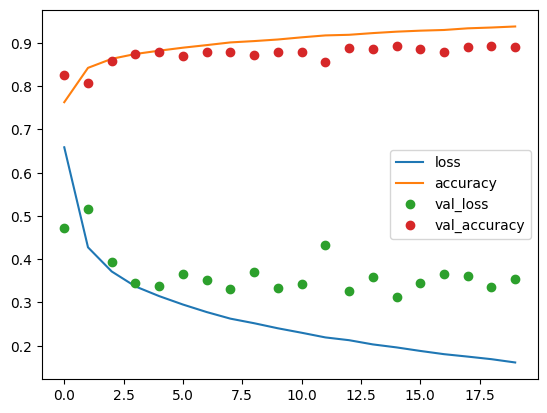

In [32]:
plt.plot(fit_history.epoch, fit_history.history['loss'], label='loss')
plt.plot(fit_history.epoch, fit_history.history['accuracy'], label='accuracy')
plt.plot(fit_history.epoch, fit_history.history['val_loss'], "o", label='val_loss')
plt.plot(fit_history.epoch, fit_history.history['val_accuracy'], "o", label='val_accuracy')
plt.legend()
plt.show()